pca in r, comp=15, cumul var=0.9022
reduce dimension

In [294]:
#import dataset
import numpy as np
import pandas as pd
train = pd.read_csv("/Users/guopeiran/Desktop/comp755/project/pca_ff.csv")
label = pd.read_csv("/Users/guopeiran/Desktop/comp755/project/label_ff.csv")

In [333]:
#test & train dataset
data = np.array(train)
label = np.array(label)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.10, random_state=111)



# knn

In [10]:
#multilabel knn
#cross-validation
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(2,8),'s':[0.5]}
#score = 'f1_macro'

clf = GridSearchCV(MLkNN(), parameters, scoring='f1_micro', cv=5)
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)


{'k': 7, 's': 0.5} 0.3775568588184809


best k=7,s=0.5

In [336]:
classifier_knn = MLkNN(k=7,s=0.5)

# train
classifier_knn.fit(X_train, y_train)

# predict
prediction_knn = classifier_knn.predict(X_test)

In [337]:
#test dataset score
from sklearn.metrics import f1_score
y_pred_knn = pd.DataFrame(np.array(prediction_knn.todense()))
y_test1 = pd.DataFrame(y_test)
f1_score(y_test1, y_pred_knn, average=None)

/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.77090364, 0.72888889, 0.7281399 , 0.59778598, 0.69966997,
       0.59444444, 0.34042553, 0.40546697, 0.        , 0.        ,
       0.        , 0.56603774, 0.56074766, 0.51351351, 0.8436019 ,
       0.        , 0.        , 0.        , 0.2556391 , 0.38139535,
       0.        , 0.56580938, 0.58333333, 0.66026871, 0.17647059,
       0.58908046, 0.25641026, 0.        ])

In [338]:
#test accuracy
from sklearn.metrics import accuracy_score
print("knn Accuracy:",accuracy_score(y_test,y_pred_knn))

knn Accuracy: 0.3638996138996139


In [339]:
f1_score(y_test1, y_pred_knn, average='macro')

/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3863583324595054

# randomforest

In [31]:
#random forest
from sklearn.ensemble import RandomForestClassifier
#cross-validation
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(20,50),'class_weight':['balanced'] }
score = 'f1_micro'

clf = GridSearchCV(RandomForestClassifier(), parameters, scoring=score, cv=5)
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)



{'class_weight': 'balanced', 'n_estimators': 43} 0.3678300672292948


In [238]:
#cutoff change
scores = []
for cutoff in np.arange(0.1,0.9,0.1):
    clf = RandomForestClassifier(n_estimators = 43,class_weight = 'balanced')
    clf.fit(X_train, y_train)
    prob = clf.predict_proba(X_train)
    y = []
    for i in range(0,24):
        y.append ( (prob[i][:,1]>cutoff).astype(int) )
    
    ypred = pd.DataFrame(y).transpose()

    y_1 = pd.DataFrame(y_train)

    validated = f1_score(y_1,ypred,average=None)
    scores.append(validated)   

[array([0.82363791, 0.934665  , 0.89039978, 0.86931996, 0.8946248 ,
       0.85320417, 0.81879801, 0.81819654, 0.98      , 0.83168317,
       0.77142857, 0.89928058, 0.87121745, 0.85265911, 0.92233478,
       1.        , 0.84140551, 0.79167641, 0.84431487, 0.87829111,
       0.84813754, 0.75757113, 0.91743119, 1.        ]), array([0.93508376, 0.978223  , 0.9602581 , 0.9585349 , 0.96139548,
       0.95357068, 0.94918806, 0.96358437, 0.98989899, 0.94382022,
       0.91525424, 0.9765625 , 0.96945967, 0.95321637, 0.9710513 ,
       1.        , 0.95200573, 0.94173272, 0.94640523, 0.95930548,
       0.96260163, 0.92029926, 0.97560976, 1.        ]), array([0.98148618, 0.99073666, 0.98703648, 0.98859587, 0.99174041,
       0.98473447, 0.99124726, 0.99195289, 1.        , 0.94382022,
       0.91525424, 0.99601594, 0.9904    , 0.9858871 , 0.99324675,
       1.        , 0.98883929, 0.99049291, 0.98503401, 0.98660714,
       1.        , 0.9827017 , 1.        , 1.        ]), array([0.99789401, 0.998

/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


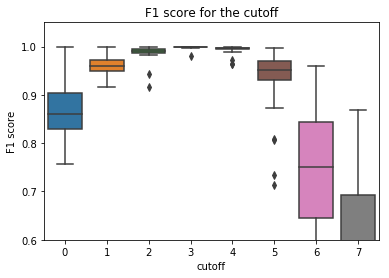

In [253]:
import seaborn as sns
from matplotlib import pyplot as plt
scores_f = pd.DataFrame(scores)
sns.boxplot(data=scores_f.transpose())
plt.xlabel('cutoff')
plt.ylabel('F1 score')
plt.title('F1 score for the cutoff')
plt.ylim(0.6,1.05)
plt.show()

beset cutoff=0.4

In [334]:
#test data accuracy with ntree=43, cutoff=0.4
clf = RandomForestClassifier(n_estimators = 43,class_weight = 'balanced')
clf.fit(X_train, y_train)
prob = clf.predict_proba(X_test)
y = []
for i in range(0,y_test.shape[1]):
    y.append ( (prob[i][:,1]>0.4).astype(int) )
    
prediction_rf = np.array(pd.DataFrame(y).transpose())

print("random forest Accuracy:",accuracy_score(y_test,prediction_rf))



random forest Accuracy: 0.379021879021879


In [335]:
#f1 score
y_pred_rf = pd.DataFrame(prediction_rf)
y_test_rf = pd.DataFrame(y_test)
f1_score(y_test_rf, y_pred_rf, average=None)

/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.79505027, 0.70422535, 0.72785829, 0.58736059, 0.67346939,
       0.60490463, 0.38410596, 0.44907407, 0.        , 0.        ,
       0.        , 0.49275362, 0.52336449, 0.54794521, 0.85      ,
       0.        , 0.        , 0.        , 0.25757576, 0.42857143,
       0.        , 0.57698057, 0.54545455, 0.66666667, 0.33333333,
       0.64562788, 0.22857143, 0.        ])

In [340]:
f1_score(y_test1, y_pred_rf, average='macro')

/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3936747672910813

# lda (small sample size)

In [548]:
label_lda = pd.read_csv("/Users/guopeiran/Desktop/comp755/project/label_lda.csv")
label_lda = np.array(label_lda)
X_train_up, X_test_up, y_train_lda, y_test_lda = train_test_split(data, label_lda, test_size=0.10, random_state=111)
y_train_lda = np.ravel(y_train_lda)
y_test_lda = np.ravel(y_test_lda)


In [549]:
# number of components = class-1 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)

X_r2 = lda.fit(X_train_up, y_train_lda).transform(X_train_up)
X_1 = lda.fit(X_train_up, y_train_lda).transform(X_test_up)

In [554]:
#update dataset
weak = [8,15,27]
for j in weak:
    #X_r2 = lda.fit(X_train_up, y_train_lda).transform(X_train_up)
    #X_r = lda.fit(X_train_up, y_train_lda).transform(X_test_up)
    for i in range(0,X_train_up.shape[0]):
        if y_train[:,j][i]==1:
            X_train_up[i,0:5] = X_r2[i,:]
            X_train_up[i,6:] = 0
    for k in range(0,X_test.shape[0]):
        if y_test[:,j][k]==1:
            X_test_up[k,0:5] = X_1[k,:]
            X_test_up[k,6:] = 0

double = [9]
for j in double:
    #X_r2 = lda.fit(X_train_up, y_train_lda).transform(X_train_up)
    #X_r = lda.fit(X_train_up, y_train_lda).transform(X_test_up)
    for i in range(0,X_train_up.shape[0]):
        if y_train[:,j][i]==1 and y_train[:,j+1][i]==1:
            X_train_up[i,0:5] = X_r2[i,:]
            X_train_up[i,6:] = 0
        elif (y_train[:,j][i]==1):
            X_train_up[i,0:5] = X_r2[i,:]
            X_train_up[i,6:] = 0
        elif y_train[:,j+1][i]==1:
            X_train_up[i,0:5] = X_r2[i,:]
            X_train_up[i,6:] = 0


    for k in range(0,X_test.shape[0]):
        if y_train[:,j][k]==1 and y_train[:,j+1][k]==1:
            X_test_up[k,0:5] = X_1[k,:]
            X_test_up[k,6:] = 0
        elif y_train[:,j][k]==1:
            X_test_up[k,0:5] = X_1[k,:]
            X_test_up[k,6:] = 0
        elif y_train[:,j+1][k]==1:
            X_test_up[k,0:5] = X_1[k,:]
            X_test_up[k,6:] = 0


In [555]:
#knn
# train
classifier_knn.fit(X_train_up, y_train)

# predict
prediction_knn_up = classifier_knn.predict(X_test_up)

#test dataset
from sklearn.metrics import f1_score
y_pred_knn_up = pd.DataFrame(np.array(prediction_knn_up.todense()))
y_test1 = pd.DataFrame(y_test)
print(f1_score(y_test1, y_pred_knn_up, average=None))
print("knn Accuracy:",accuracy_score(y_test,y_pred_knn_up))
f1_score(y_test1, y_pred_knn_up, average='macro')

[0.77194299 0.72888889 0.72496025 0.59778598 0.70198675 0.59444444
 0.35211268 0.40816327 0.8        0.         0.         0.56603774
 0.56074766 0.51351351 0.8436019  0.4        0.         0.
 0.26865672 0.37962963 0.         0.56580938 0.58741259 0.66666667
 0.17647059 0.590681   0.25       0.        ]
knn Accuracy: 0.36518661518661516


/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4303397367129817

In [556]:
#random forest
clf.fit(X_train_up, y_train)
prob_up = clf.predict_proba(X_test_up)
y_up = []
for i in range(0,y_test.shape[1]):
    y_up.append ( (prob_up[i][:,1]>0.4).astype(int) )
    
prediction_rf_up = np.array(pd.DataFrame(y_up).transpose())

print("random forest Accuracy:",accuracy_score(y_test,prediction_rf_up))
y_pred_rf_up = pd.DataFrame(prediction_rf_up)
y_test_rf = pd.DataFrame(y_test)
print(f1_score(y_test_rf, y_pred_rf_up, average=None))
print(f1_score(y_test1, y_pred_rf_up, average='macro'))

random forest Accuracy: 0.3819176319176319
[0.79768786 0.68269231 0.74203822 0.58646617 0.68918919 0.61917808
 0.39215686 0.44851259 0.66666667 0.         0.         0.52777778
 0.50485437 0.52054795 0.84263959 0.66666667 0.         0.
 0.31111111 0.43636364 0.         0.60059172 0.60740741 0.6328125
 0.38888889 0.64675325 0.1875     0.66666667]
0.4701846236857499


/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guopeiran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [570]:
#overall
all_X = np.concatenate([X_train_up, X_test_up])
all_y = np.concatenate([y_train, y_test])
#knn
# train
classifier_knn.fit(X_train_up, y_train)

# predict
prediction_knn_up = classifier_knn.predict(all_X)

#test dataset
from sklearn.metrics import f1_score
y_pred_knn_up = pd.DataFrame(np.array(prediction_knn_up.todense()))
y_test1 = pd.DataFrame(all_y)
print(f1_score(y_test1, y_pred_knn_up, average=None))
print("knn Accuracy:",accuracy_score(all_y,y_pred_knn_up))
f1_score(y_test1, y_pred_knn_up, average='macro')

[0.82323344 0.73878872 0.74996086 0.60307195 0.69786692 0.62072313
 0.46978955 0.51799221 0.81818182 0.84782609 0.71698113 0.636908
 0.50300601 0.49246231 0.84384093 0.71428571 0.09326425 0.18473896
 0.37048917 0.47597254 0.07777778 0.61382114 0.5522279  0.72101662
 0.48303393 0.66409532 0.34022989 0.30769231]
knn Accuracy: 0.4225669412976313


0.5599742350609526

In [573]:
#overall
#random forest
clf.fit(X_train_up, y_train)
prob_up = clf.predict_proba(all_X)
y_up = []
for i in range(0,y_test.shape[1]):
    y_up.append ( (prob_up[i][:,1]>0.4).astype(int) )
    
prediction_rf_up = np.array(pd.DataFrame(y_up).transpose())

print("random forest Accuracy:",accuracy_score(all_y,prediction_rf_up))
y_pred_rf_up = pd.DataFrame(prediction_rf_up)
y_test_rf = pd.DataFrame(all_y)
print(f1_score(y_test_rf, y_pred_rf_up, average=None))
print(f1_score(y_test1, y_pred_rf_up, average='macro'))

random forest Accuracy: 0.9335092687950567
[0.97783623 0.96984515 0.97548064 0.95994747 0.97542327 0.97046926
 0.9517031  0.95373406 0.97247706 0.96551724 0.98181818 0.96490407
 0.96136701 0.96571429 0.98204159 0.97560976 0.93480441 0.93670886
 0.94165222 0.95287595 0.9382716  0.96092386 0.962729   0.96756478
 0.96190476 0.96509716 0.95583596 0.95238095]
0.961951353655589
